In [1]:
from parcels import FieldSet, ParticleSet, JITParticle, AdvectionRK4, plotTrajectoriesFile, ErrorCode
from datetime import timedelta
import numpy as np
from scipy.io import netcdf
from netCDF4 import Dataset
import pandas as pd

from mpl_toolkits.basemap import Basemap


import urllib2
import StringIO
import csv
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pickle as pickle


filenames = {'U': "MITgcm_data/UV*.cdf",
             'V': "MITgcm_data/UV*.cdf"}

In [2]:

variables = {'U': 'U',
             'V': 'V'}
dimensions = {'time': 'TIME1','depth': 'DEPTH_T1_4',
              'lat': 'LATITUDE_T',
              'lon': 'LONGITUDE_U'}

In [3]:
fieldset = FieldSet.from_netcdf(filenames, variables, dimensions)

In [11]:
def DeleteParticle(particle, fieldset, time, dt):
    particle.delete()

In [164]:
# Attempting to run single particle for 50 days in a for loop (7 times)

for i in range(7):

    lat = [27.952]
    lon = [178.991]

    pset = ParticleSet(fieldset=fieldset, pclass=JITParticle, lon=lon, lat=lat)
    
    pset.execute(AdvectionRK4,
             runtime=timedelta(days=50),  # runtime controls the interval of the plots
             dt=timedelta(hours=1),
             recovery={ErrorCode.ErrorOutOfBounds: DeleteParticle},
             output_file=pset.ParticleFile(name="SingleDrifter_{}_50days".format(i), outputdt=timedelta(hours=1)))

INFO: Compiled JITParticleAdvectionRK4 ==> /var/folders/nj/pymsyw7n28qdntb958tl337c0000gp/T/parcels-502/8af463fe752aac0b6abad57d41568a31.so
INFO: Compiled JITParticleAdvectionRK4 ==> /var/folders/nj/pymsyw7n28qdntb958tl337c0000gp/T/parcels-502/15a258e87e9171cd2f984a57574886ef.so
INFO: Compiled JITParticleAdvectionRK4 ==> /var/folders/nj/pymsyw7n28qdntb958tl337c0000gp/T/parcels-502/988ebc4757323d1fb651d814ea39da39.so
INFO: Compiled JITParticleAdvectionRK4 ==> /var/folders/nj/pymsyw7n28qdntb958tl337c0000gp/T/parcels-502/13c9b47992c5a85d1cd02f381f19d5e7.so
INFO: Compiled JITParticleAdvectionRK4 ==> /var/folders/nj/pymsyw7n28qdntb958tl337c0000gp/T/parcels-502/88d9775cb9e27b487ce07d8b02d26f23.so
INFO: Compiled JITParticleAdvectionRK4 ==> /var/folders/nj/pymsyw7n28qdntb958tl337c0000gp/T/parcels-502/99dcef96668ec42d5a390bbb92192c75.so
INFO: Compiled JITParticleAdvectionRK4 ==> /var/folders/nj/pymsyw7n28qdntb958tl337c0000gp/T/parcels-502/0f5d472fdf1d9a0b53a589dc4442f2b0.so


In [3]:
lat = [31.082, 29.152, 32.794, 30.900, 27.781, 27.952, 18.640, 29.661, 24.174, 21.020, 34.102, 33.462, 31.458, 32.024, 15.509, 18.906, 17.074, 16.555]
lon = [176.366, 191.072, 197.52, 193.91, 178.991, 194.899, 178.040, 208.099, 191.298, 187.602, 188.077, 181.109, 183.82, 179.190, 180.468, 189.375, 206.097, 190.914]

In [4]:
# lat = [27.952]
# lon = [178.991]

# #To release 100 particles instead of 1 particle per location. Choose random location 3. 
# latx100 = np.tile(lat[2], 1)
# lonx100 = np.tile(lat[2], 1)

pset = ParticleSet(fieldset=fieldset, pclass=JITParticle, lon=lon, lat=lat)
# #To release 100 particles instead of 1 particle per location. 
# pset = ParticleSet(fieldset=fieldset, pclass=JITParticle, lon=lonx100, lat=latx100)

In [175]:
# Attempting to advect the particles for 244 days with dt 1 h

pset = ParticleSet(fieldset=fieldset, pclass=JITParticle, lon=[178.991, 178.991], lat=[27.952, 27.952])

# Trying to advect the particles for 244 days with dt 1 h
pset.execute(AdvectionRK4,
             runtime=timedelta(days=244),  # runtime controls the interval of the plots
             dt=timedelta(hours=1),
             recovery={ErrorCode.ErrorOutOfBounds: DeleteParticle},
             output_file=pset.ParticleFile(name="Drifters18_244days.nc", outputdt=timedelta(hours=1)))  # the file name and the time step of the outputs)  # the recovery kernel

INFO: Compiled JITParticleAdvectionRK4 ==> /var/folders/nj/pymsyw7n28qdntb958tl337c0000gp/T/parcels-502/f38b32f995d152ed54e1604f34e1b169.so


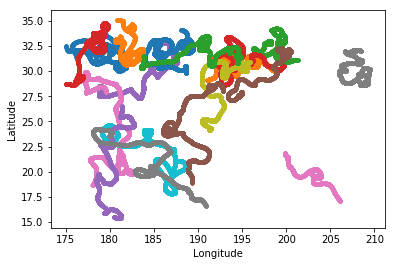

<module 'matplotlib.pyplot' from '/Users/mho/anaconda3/envs/py2_parcels/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [4]:
plotTrajectoriesFile('Drifters18_244days.nc')

# Map trajectories with basemap

In [3]:
pfile = Dataset('Drifters18_244days.nc', 'r')
lon = pfile.variables['lon']

# For determining the boundaries of the basemap
print('min long: ', np.nanmin(lon))
print('max long: ', np.nanmax(lon))

lat = pfile.variables['lat']
print('min lat: ', np.nanmin(lat))
print('max lat: ', np.nanmax(lat))


# For determining the boundaries of the basemap
min_long = np.nanmin(lon)
max_long = np.nanmax(lon)
min_lat = np.nanmin(lat)
max_lat = np.nanmax(lat)


('min long: ', 175.02008)
('max long: ', 209.51015)
('min lat: ', 15.416354)
('max lat: ', 35.0393)


/Users/mho/anaconda3/envs/py2_parcels/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:4780: RuntimeWarning: invalid value encountered in greater
  lonsin = np.where(lonsin > lon_0+180, lonsin-360 ,lonsin)
/Users/mho/anaconda3/envs/py2_parcels/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:4781: RuntimeWarning: invalid value encountered in less
  lonsin = np.where(lonsin < lon_0-180, lonsin+360 ,lonsin)
/Users/mho/anaconda3/envs/py2_parcels/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:4787: RuntimeWarning: invalid value encountered in greater_equal
  itemindex = len(lonsin)-np.where(londiff>=thresh)[0]
/Users/mho/anaconda3/envs/py2_parcels/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:4818: RuntimeWarning: invalid value encountered in less
  mask = np.logical_or(lonsin<lon_0-180,lonsin>lon_0+180)
/Users/mho/anaconda3/envs/py2_parcels/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:4818: RuntimeWarning: invalid value 

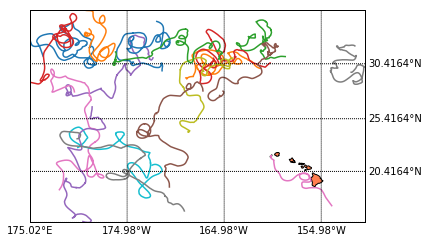

In [4]:
mapper = Basemap(projection='merc',
                 llcrnrlon=np.nanmin(lon),
                 llcrnrlat=np.nanmin(lat),
                 urcrnrlon=np.nanmax(lon),
                 urcrnrlat=np.nanmax(lat),
                 resolution='i')
mapper.drawmapboundary()
mapper.drawcoastlines()
mapper.fillcontinents(color='coral',lake_color='aqua')
# plot each trajectory separately
# documentation: https://matplotlib.org/basemap/index.html
for i in range(lon.shape[0]):
    lons = lon[:][i]
    lats = lat[:][i]
    mapper.plot(np.array(lons), np.array(lats), latlon=True)

parallels = np.arange(min_lat,max_lat,5.)
# labels = [left,right,top,bottom]
mapper.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(min_long,max_long,10)
mapper.drawmeridians(meridians,labels=[True,False,False,True])

plt.show()

In [10]:
min_lat,max_lat

(15.416354, 35.0393)

In [11]:
min_long

175.02008

In [16]:
'http://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSrtm30v6.csv?topo[(' \
                            +str(maxlat)+'):1:('+str(minlat)+')][('+str(minlon)+'):1:('+str(maxlon)+')]'

'http://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSrtm30v6.csv?topo[(35.0393):1:(15.416354)][(175.02008):1:(180)]'

In [5]:
# Definine the domain of interest
minlat = min_lat
maxlat = max_lat
minlon = min_long
maxlon = 179.99166666666667
 
# Read data from: http://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSrtm30v6.html
response = urllib2.urlopen('http://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSrtm30v6.csv?topo[(' \
                            +str(maxlat)+'):1:('+str(minlat)+')][('+str(minlon)+'):1:('+str(maxlon)+')]')

data = StringIO.StringIO(response.read())
 
r = csv.DictReader(data,dialect=csv.Sniffer().sniff(data.read(1000)))
data.seek(0)
 
# Initialize variables
lat, lon, topo = [], [], []
 
# Loop to parse 'data' into our variables
# Note that the second row has the units (i.e. not numbers). Thus we implement a
# try/except instance to prevent the loop for breaking in the second row (ugly fix)
for row in r:
    try:
        lat.append(float(row['latitude']))
        lon.append(float(row['longitude']))
        topo.append(float(row['topo']))
    except:
        print 'Row '+str(row)+' is a bad...'


minlat = min_lat
maxlat = max_lat
minlon = -180
maxlon = -(360 - max_long)

response2 = urllib2.urlopen('http://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSrtm30v6.csv?topo[(' \
                            +str(maxlat)+'):1:('+str(minlat)+')][('+str(minlon)+'):1:('+str(maxlon)+')]')

data2 = StringIO.StringIO(response2.read())

r2 = csv.DictReader(data2,dialect=csv.Sniffer().sniff(data2.read(1000)))
data2.seek(0)
        
for row in r2:
    try:
        lat.append(float(row['latitude']))
        lon.append(float(row['longitude']))
        topo.append(float(row['topo']))
    except:
        print 'Row '+str(row)+' is a bad...'
        
with open("lon.txt", 'w') as f:
    pickle.dump(lon, f)
with open("lat.txt", 'wb') as fp:
    pickle.dump(lat, fp)
with open("topo.txt", 'wb') as tp:
    pickle.dump(topo, tp)

Row {'latitude': 'degrees_north', 'topo': 'meters', 'longitude': 'degrees_east'} is a bad...
Row {'latitude': 'degrees_north', 'topo': 'meters', 'longitude': 'degrees_east'} is a bad...


In [ ]:
# Convert 'lists' into 'numpy arrays'
lat  = np.array(lat,  dtype='float')
lon  = np.array(lon,  dtype='float')
topo = np.array(topo, dtype='float')
 
# Data resolution determined from here:
# http://coastwatch.pfeg.noaa.gov/erddap/info/usgsCeSrtm30v6/index.html
resolution = 0.1
 
# Determine the number of grid points in the x and y directions
nx = complex(0,(max(lon)-min(lon))/resolution)
ny = complex(0,(max(lat)-min(lat))/resolution)
 
# Build 2 grids: One with lats and the other with lons
grid_x, grid_y = np.mgrid[min(lon):max(lon):nx,min(lat):max(lat):ny]
 
# Interpolate topo into a grid (x by y dimesions)
grid_z = scipy.interpolate.griddata((lon,lat),topo,(grid_x,grid_y),method='linear')
 
# Make an empty 'dictionary'... place the 3 grids in it.
TOPO = {}
TOPO['lats']=grid_y
TOPO['lons']=grid_x
TOPO['topo']=grid_z

# Save (i.e. pickle) the data for later use
# This saves the variable TOPO (with all its contents) into the file: topo.p
pickle.dump(TOPO, open('topo.p','wb'))

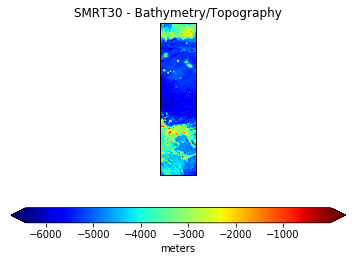

In [18]:
# Create map
m = Basemap(projection='mill', llcrnrlat=minlat,urcrnrlat=maxlat,llcrnrlon=minlon, urcrnrlon=maxlon,resolution='h')
x,y = m(grid_x[:],grid_y[:])
 
fig1 = plt.figure()
cs = m.pcolor(x,y,grid_z,cmap=plt.cm.jet)
m.drawcoastlines()
m.drawmapboundary()
plt.title('SMRT30 - Bathymetry/Topography')
cbar = plt.colorbar(orientation='horizontal', extend='both')
cbar.ax.set_xlabel('meters')
 
# Save figure (without 'white' borders)
plt.savefig('topo.png', bbox_inches='tight')